### Importação dos dados



In [47]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [48]:
faturamento_loja1 = loja1['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

faturamento = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento Total': [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
})

print(faturamento)





     Loja  Faturamento Total
0  Loja 1         1534509.12
1  Loja 2         1488459.06
2  Loja 3         1464025.03
3  Loja 4         1384497.58


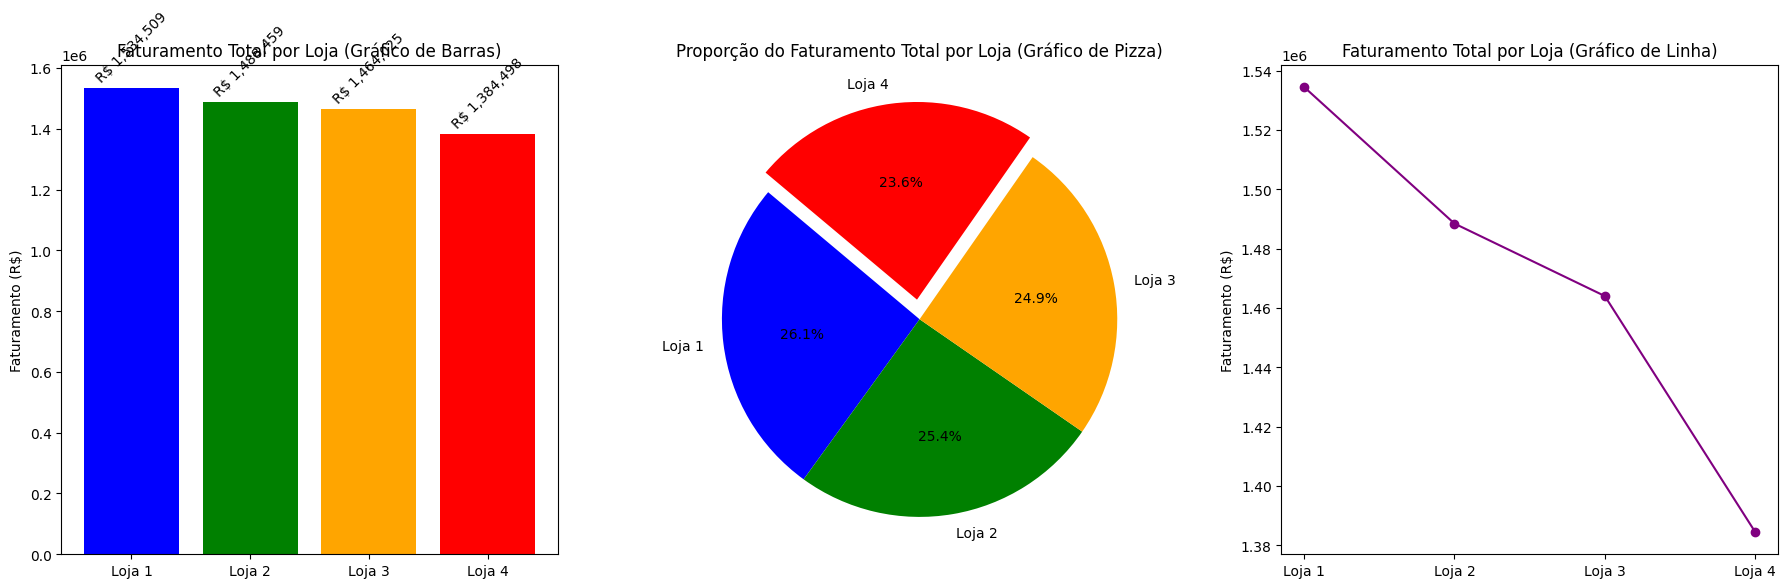

In [49]:
import matplotlib.pyplot as plt
import numpy as np

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamento = [1534509.12, 1488459.06, 1464025.03, 1384497.58]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].bar(lojas, faturamento, color=['blue', 'green', 'orange', 'red'])
axes[0].set_title('Faturamento Total por Loja (Gráfico de Barras)')
axes[0].set_ylabel('Faturamento (R$)')
axes[0].tick_params(axis='x', rotation=0)

for i, v in enumerate(faturamento):
    axes[0].text(i, v + 10000, f'R$ {v:,.0f}', ha='center', va='bottom', rotation=45)

total_geral = sum(faturamento)
proporcoes = [x / total_geral for x in faturamento]
explode = (0, 0, 0, 0.1)

axes[1].pie(faturamento, explode=explode, labels=lojas, autopct='%1.1f%%', startangle=140, colors=['blue', 'green', 'orange', 'red'])
axes[1].set_title('Proporção do Faturamento Total por Loja (Gráfico de Pizza)')
axes[1].axis('equal')

indices_lojas = np.arange(len(lojas))
axes[2].plot(indices_lojas, faturamento, marker='o', linestyle='-', color='purple')
axes[2].set_title('Faturamento Total por Loja (Gráfico de Linha)')
axes[2].set_ylabel('Faturamento (R$)')
axes[2].set_xticks(indices_lojas)
axes[2].set_xticklabels(lojas)

plt.tight_layout()

plt.show()

# 2. Vendas por Categoria


In [50]:
loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

def vendas_por_categoria(df, nome_loja):
    categorias = df['Categoria do Produto'].value_counts()
    print(f"\nTotal de vendas por categoria - {nome_loja}")
    print(categorias)

vendas_por_categoria(loja1, 'Loja 1')
vendas_por_categoria(loja2, 'Loja 2')
vendas_por_categoria(loja3, 'Loja 3')
vendas_por_categoria(loja4, 'Loja 4')



Total de vendas por categoria - Loja 1
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

Total de vendas por categoria - Loja 2
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64

Total de vendas por categoria - Loja 3
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64

Total de vendas por categoria - Loja 4
Cat

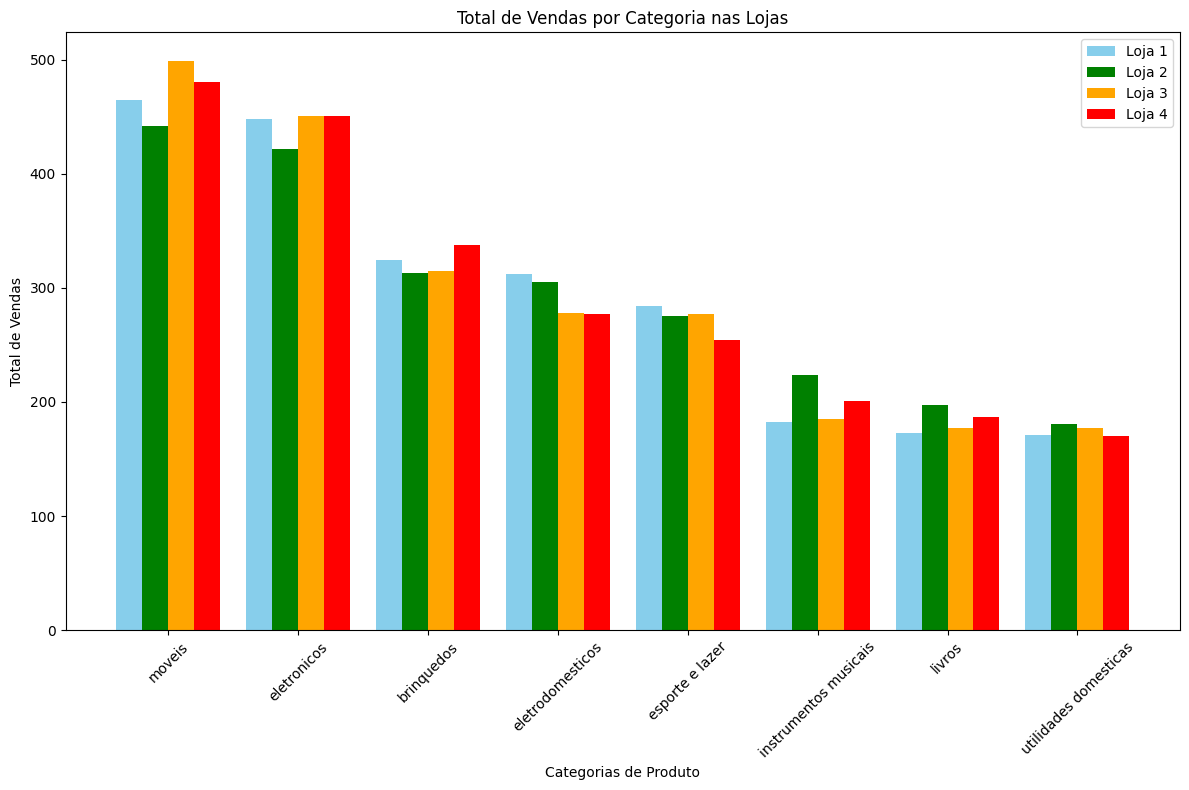

In [51]:
import matplotlib.pyplot as plt
import numpy as np

categorias = ['moveis', 'eletronicos', 'brinquedos', 'eletrodomesticos', 'esporte e lazer',
              'instrumentos musicais', 'livros', 'utilidades domesticas']

vendas_loja1 = [465, 448, 324, 312, 284, 182, 173, 171]
vendas_loja2 = [442, 422, 313, 305, 275, 224, 197, 181]
vendas_loja3 = [499, 451, 315, 278, 277, 185, 177, 177]
vendas_loja4 = [480, 451, 338, 277, 254, 201, 187, 170]


fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.2
index = np.arange(len(categorias))

ax.bar(index - 1.5 * bar_width, vendas_loja1, bar_width, label='Loja 1', color='skyblue')
ax.bar(index - 0.5 * bar_width, vendas_loja2, bar_width, label='Loja 2', color='green')
ax.bar(index + 0.5 * bar_width, vendas_loja3, bar_width, label='Loja 3', color='orange')
ax.bar(index + 1.5 * bar_width, vendas_loja4, bar_width, label='Loja 4', color='red')

ax.set_title('Total de Vendas por Categoria nas Lojas')
ax.set_xlabel('Categorias de Produto')
ax.set_ylabel('Total de Vendas')
ax.set_xticks(index)
ax.set_xticklabels(categorias, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()



# 3. Média de Avaliação das Lojas

In [52]:
avaliacao_loja1 = loja1['Avaliação da compra'].mean()
avaliacao_loja2 = loja2['Avaliação da compra'].mean()
avaliacao_loja3 = loja3['Avaliação da compra'].mean()
avaliacao_loja4 = loja4['Avaliação da compra'].mean()

avaliacoes = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Média de Avaliação': [avaliacao_loja1, avaliacao_loja2, avaliacao_loja3, avaliacao_loja4]
})

print(avaliacoes)


     Loja  Média de Avaliação
0  Loja 1            3.976685
1  Loja 2            4.037304
2  Loja 3            4.048326
3  Loja 4            3.995759


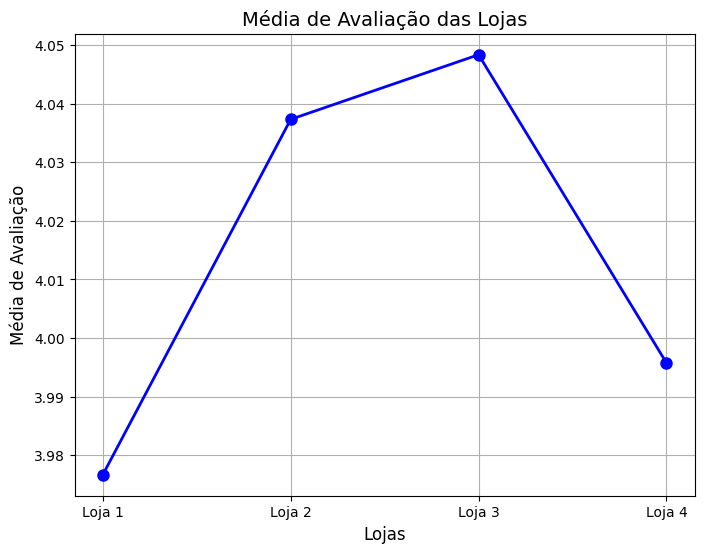

In [53]:
import matplotlib.pyplot as plt

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
avaliacoes = [3.976685, 4.037304, 4.048326, 3.995759]


plt.figure(figsize=(8, 6))
plt.plot(lojas, avaliacoes, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

plt.title('Média de Avaliação das Lojas', fontsize=14)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Média de Avaliação', fontsize=12)
plt.grid(True)

plt.show()


# 4. Produtos Mais e Menos Vendidos

In [54]:
def produtos_mais_menos_vendidos(df, nome_loja):
    produtos_vendidos = df['Produto'].value_counts()

    produto_mais_vendido = produtos_vendidos.idxmax()
    qtd_mais_vendido = produtos_vendidos.max()

    produto_menos_vendido = produtos_vendidos.idxmin()
    qtd_menos_vendido = produtos_vendidos.min()

    print(f"\n{nome_loja}")
    print(f"Produto mais vendido: {produto_mais_vendido} (Quantidade: {qtd_mais_vendido})")
    print(f"Produto menos vendido: {produto_menos_vendido} (Quantidade: {qtd_menos_vendido})")

produtos_mais_menos_vendidos(loja1, "Loja 1")
produtos_mais_menos_vendidos(loja2, "Loja 2")
produtos_mais_menos_vendidos(loja3, "Loja 3")
produtos_mais_menos_vendidos(loja4, "Loja 4")



Loja 1
Produto mais vendido: Micro-ondas (Quantidade: 60)
Produto menos vendido: Headset (Quantidade: 33)

Loja 2
Produto mais vendido: Iniciando em programação (Quantidade: 65)
Produto menos vendido: Jogo de tabuleiro (Quantidade: 32)

Loja 3
Produto mais vendido: Kit banquetas (Quantidade: 57)
Produto menos vendido: Blocos de montar (Quantidade: 35)

Loja 4
Produto mais vendido: Cama box (Quantidade: 62)
Produto menos vendido: Guitarra (Quantidade: 33)


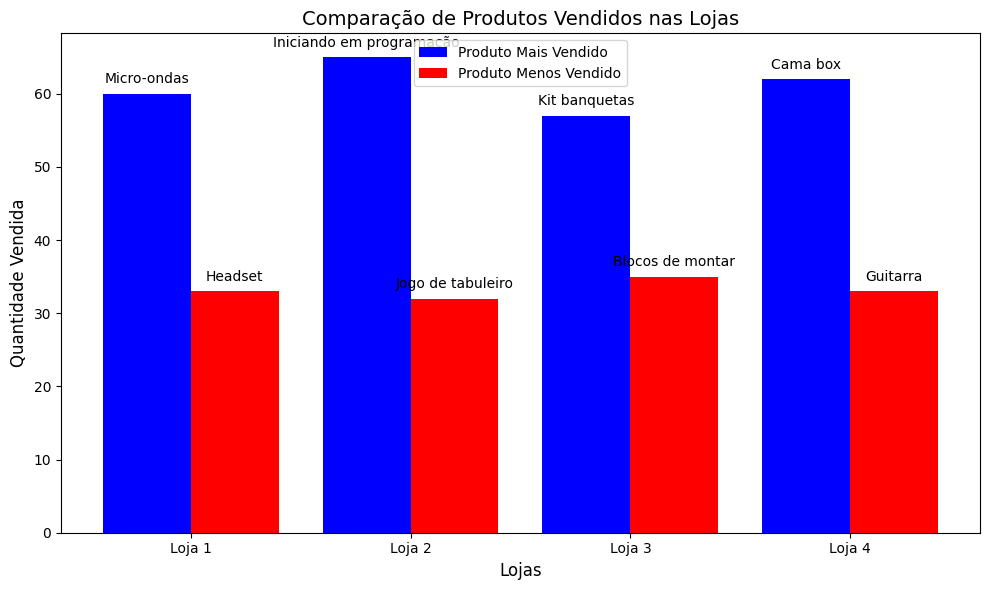

In [55]:
import matplotlib.pyplot as plt
import numpy as np

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
produtos_mais_vendidos = [60, 65, 57, 62]
produtos_menos_vendidos = [33, 32, 35, 33]
nomes_produtos_mais_vendidos = ['Micro-ondas', 'Iniciando em programação', 'Kit banquetas', 'Cama box']
nomes_produtos_menos_vendidos = ['Headset', 'Jogo de tabuleiro', 'Blocos de montar', 'Guitarra']

largura = 0.4

posicoes = np.arange(len(lojas))

fig, ax = plt.subplots(figsize=(10, 6))

barra_mais_vendido = ax.bar(posicoes - largura/2, produtos_mais_vendidos, largura, label='Produto Mais Vendido', color='blue')

barra_menos_vendido = ax.bar(posicoes + largura/2, produtos_menos_vendidos, largura, label='Produto Menos Vendido', color='red')

for i in range(len(lojas)):
    ax.text(posicoes[i] - largura/2, produtos_mais_vendidos[i] + 1, nomes_produtos_mais_vendidos[i], ha='center', va='bottom', fontsize=10)
    ax.text(posicoes[i] + largura/2, produtos_menos_vendidos[i] + 1, nomes_produtos_menos_vendidos[i], ha='center', va='bottom', fontsize=10)

ax.set_title('Comparação de Produtos Vendidos nas Lojas', fontsize=14)
ax.set_xlabel('Lojas', fontsize=12)
ax.set_ylabel('Quantidade Vendida', fontsize=12)
ax.set_xticks(posicoes)
ax.set_xticklabels(lojas)
ax.legend()

plt.tight_layout()
plt.show()




# 5. Frete Médio por Loja


In [56]:
frete_medio_loja1 = loja1['Frete'].mean()
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()

fretes = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Frete Médio (R$)': [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]
})

print(fretes)



     Loja  Frete Médio (R$)
0  Loja 1         34.691805
1  Loja 2         33.621941
2  Loja 3         33.074464
3  Loja 4         31.278997


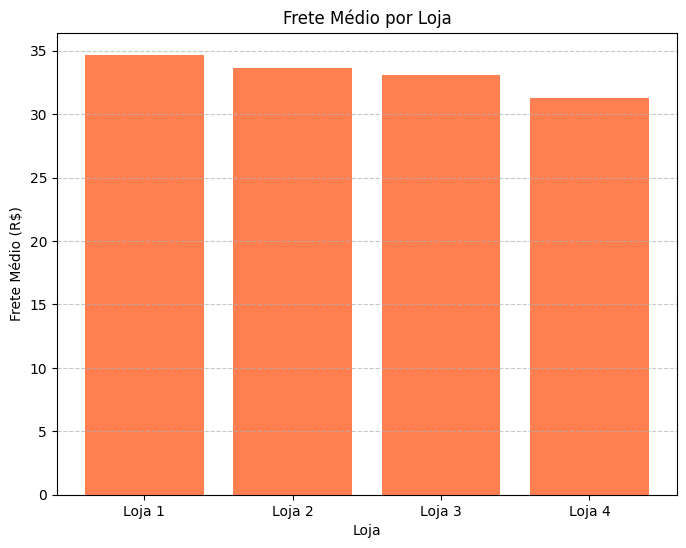

In [57]:
plt.figure(figsize=(8,6))
plt.bar(fretes['Loja'], fretes['Frete Médio (R$)'], color='coral')
plt.title('Frete Médio por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete Médio (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Relatório de Análise para Decisão de Venda da Loja**

Após a análise detalhada das informações fornecidas sobre as lojas da rede Alura Store, com base no faturamento total, vendas por categoria, média de avaliação, produtos mais e menos vendidos e custo médio de frete, o objetivo é determinar qual loja apresenta o menor desempenho e deve ser considerada para venda.

1. Faturamento Total:

O faturamento total de cada loja é um dos principais indicadores de performance. As lojas estão organizadas conforme o faturamento total:

Loja 1: R$ 1.534.509,12

Loja 2: R$ 1.488.459,06

Loja 3: R$ 1.464.025,03

Loja 4: R$ 1.384.497,58

A Loja 4 apresenta o menor faturamento total, com R$ 1.384.497,58, o que pode indicar uma performance abaixo das outras lojas.

2. Vendas por Categoria de Produto:
Analisando as categorias de produto mais vendidas em cada loja, verificamos a quantidade de unidades vendidas para as principais categorias:

Loja 1: A maior venda foi de móveis (465 unidades), seguida de eletrônicos (448 unidades).

Loja 2: A maior venda foi de móveis (442 unidades), seguida de eletrônicos (422 unidades).

Loja 3: A maior venda foi de móveis (499 unidades), seguida de eletrônicos (451 unidades).

Loja 4: A maior venda foi de móveis (480 unidades), seguida de eletrônicos (451 unidades).

A Loja 4 tem um desempenho de vendas um pouco abaixo em várias categorias, especialmente em eletrodomésticos e instrumentos musicais, se comparada às outras lojas, que mostram mais equilíbrio nas vendas.

3. Média de Avaliação:
A média de avaliação dos clientes é uma métrica importante para entender a satisfação dos consumidores:

Loja 1: Média de 3.98

Loja 2: Média de 4.04

Loja 3: Média de 4.05

Loja 4: Média de 3.99

A Loja 3 se destaca com a maior média de avaliação, mostrando um bom nível de satisfação do cliente. A Loja 4, com a menor média de avaliação, pode indicar uma experiência do cliente abaixo das expectativas.

4. Produtos Mais e Menos Vendidos:
Verificando os produtos mais e menos vendidos, observamos:

Loja 1: O micro-ondas é o produto mais vendido, com 60 unidades, e o headset o menos vendido, com 33 unidades.

Loja 2: O produto mais vendido é "Iniciando em programação" com 65 unidades, e o menos vendido é o jogo de tabuleiro com 32 unidades.

Loja 3: O kit banquetas é o produto mais vendido com 57 unidades, e o bloco de montar o menos vendido com 35 unidades.

Loja 4: O produto mais vendido é a cama box com 62 unidades, e o menos vendido é a guitarra com 33 unidades.

Embora a Loja 4 tenha um bom desempenho em termos de produtos mais vendidos, o baixo número de vendas de produtos como guitarras pode indicar uma limitação de opções ou demanda para certos produtos.

5. Custo Médio do Frete:
O custo do frete também é uma métrica importante para entender os custos operacionais:

Loja 1: R$ 34,69

Loja 2: R$ 33,62

Loja 3: R$ 33,07

Loja 4: R$ 31,28

A Loja 4 apresenta o custo médio de frete mais baixo, o que é uma vantagem operacional em termos de custos.

Análise Conclusiva:
Apesar da Loja 4 ter o custo médio de frete mais baixo e um desempenho razoável em algumas categorias de vendas, ela apresenta o menor faturamento total e a menor média de avaliação dos clientes. Além disso, a Loja 4 tem um desempenho inferior em várias categorias de produto, especialmente quando comparada à Loja 3, que apresenta o melhor desempenho de avaliação e faturamento.

A Loja 4 parece ser a que apresenta maior risco para o negócio no momento, tanto em termos de faturamento quanto de satisfação do cliente. Embora o custo de frete seja favorável, a menor avaliação e o menor faturamento total indicam que ela é a candidata mais provável para venda.

Recomendação: Com base em uma análise combinada dos dados de faturamento, avaliação dos clientes e desempenho geral, recomenda-se que a Loja 4 seja a loja a ser vendida para possibilitar o investimento em um novo empreendimento.

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
